# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: Bernard Tan
### Preferred Name (if different): Bernard
### Student ID: 015215317
### Email address: bernard.tan@sjsu.edu


##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

# Citation :
# 1. From Canvas Project Example (Jupyter Notebook, Regression.Boston.ipynb)
# 2. Loading CSV Dataset using Pandas (https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/import-csv-files-pandas-dataframes/) 

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [5]:
# Load Dataset
ds = pd.read_csv (r'homework3_input_data.csv')

#### Code the solution

In [6]:
# Data Frame and Dependent Variable
df = ds[['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']]
dv = ds['csMPa']

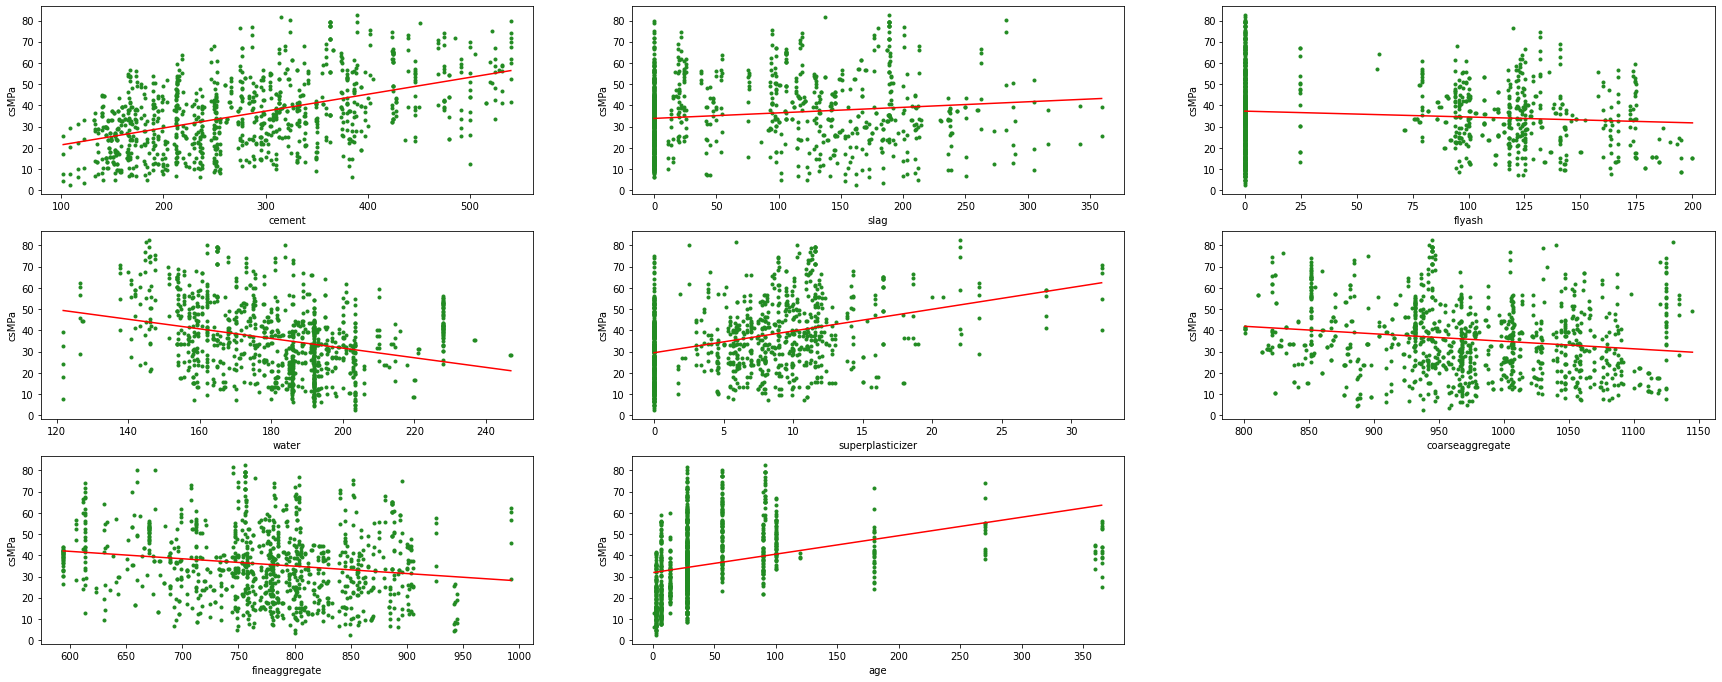

In [7]:
# Plot Relationship between Independent Variable and Dependent Variable
plt.figure(figsize=(30,20))

for i, col in enumerate(df.columns[0:13]):
    plt.subplot(5, 3, i+1)
    x = df[col]
    y = dv
    plt.plot(x, y, '.', color="forestgreen")
    
    # Create Linear Regression Line:
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="red")
    plt.xlabel(col)
    plt.ylabel('csMPa')

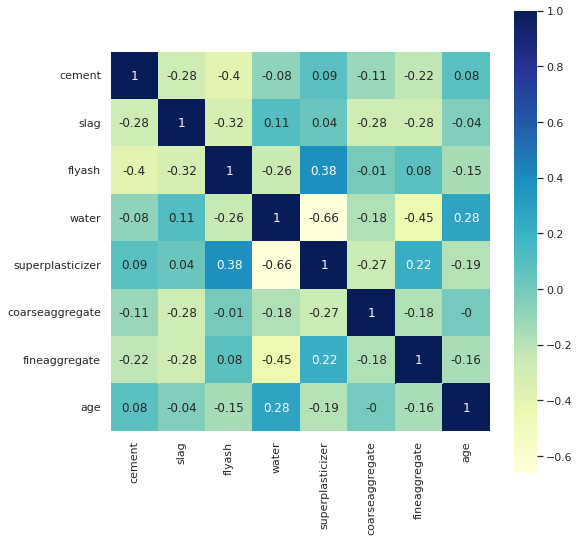

In [8]:
# Plot Correlation Matrix
features = df
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

In [9]:
# Break Data into Taining and Test Datasets
X_train, X_test, Y_train, Y_test = train_test_split(df, dv, test_size=0.2, random_state=0)

In [10]:
# Load Model & Set Aside Test Data
model = linear_model.LinearRegression().fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

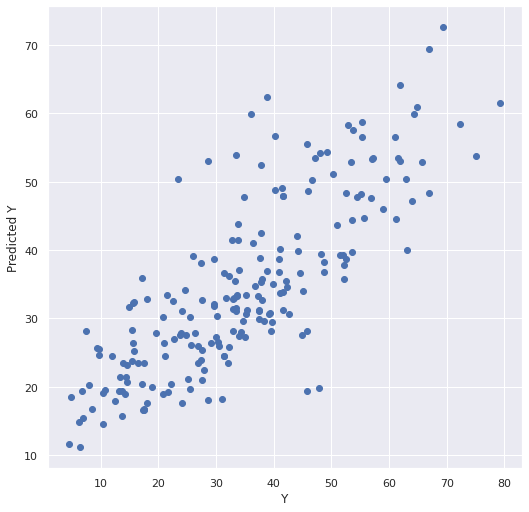

In [12]:
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Y")
plt.ylabel("Predicted Y")

In [11]:
# Print Mean Squared Error and Coefficient of Determination
print('Mean Squared Error : %.2f' % mean_squared_error(Y_test, Y_test_pred))
print('Coefficient of Determination : %.2f' % r2_score(Y_test, Y_test_pred))

Mean Squared Error : 95.62
Coefficient of Determination : 0.64
